In [16]:
import pandas as pd
import matplotlib.pyplot as plt


## Ribbon charts

Generally, a time-series chart represents the aggregate value (mean, median, sum etc.,) of a variable on a given time unit (day, week, month etc). But what if you want to represent the variation in the data as well? Ribbon charts are useful here - in representing the distribution of data in a time-series. This distribution is presented as min-max or 5-95 percentile data on a given time stamp.

Pre-requisites for preparing Ribbon charts:
1. Disaggregated time-series data with variation at time unit level. 

In [129]:
def create_ribbon_charts(df, variable_name, time_stamp_column, label_name, title,
                         percentile_lowerlimit=0.05, percentile_higherlimit=0.95): 
    '''
    :param df: Disaggregated time-series data with variation at time unit level. 
    :param variable_name: The variable of interest.
    :param time_stamp_column: Name of the timeseries column.
    :label_name: Label name of the variable of interest.
    :title: Title of the plot.
    
    :percentile_lowerlimit: Lower percentile range at a timestamp (default 5 percentile)
    :percentile_higherlimit: Higher percentile range at a timestamp (default 95 percentile)
    '''
    #Low and high percentile range at every timestamp
    pct_low = df.groupby([time_stamp_column])[[variable_name]].quantile(percentile_lowerlimit).reset_index()    
    pct_high = df.groupby([time_stamp_column])[[variable_name]].quantile(percentile_higherlimit).reset_index()
    mean = df.groupby([time_stamp_column])[[variable_name]].mean().reset_index()
    fig = plt.figure(figsize=(15,5)) 
    
    x = pct_low[time_stamp_column]
    y1 = pct_low[variable_name]
    y2 = pct_high[variable_name]
    y_m = mean[variable_name]
    
    plt.plot(x,y1,color='pink',label=label_name,alpha=0.5)
    plt.plot(x,y2,color='pink',alpha=0.5)
    plt.fill_between(x, y1, y2, color='pink', alpha=0.5)
    plt.plot(x,y_m,color='black',linestyle='dashed')
    
    plt.ylabel(label_name)
    plt.title(title)
    plt.show(True)
    return None
    
    

In [130]:
# Time series data -- Fortnightly NO2 levels in Indian cities from 2020/01 - 2022/06.
# Though the data is aggregated at city level (one city has one value per time stamp) - data is disaggregated at all-India Level. (Multiple cities data on a given time stamp)
time_series_df = pd.read_csv('Data/NO2_NCAP.csv')
time_series_df['date'] = pd.to_datetime(time_series_df['date'])
time_series_df.sample(5)

,date,tropospheric_NO2_column_number_density,airshed,North-South
3290,2022-02-15,0.000038,kolhapur,South
304,2020-03-15,0.000025,amravati,North
5665,2021-01-30,0.000039,sundernagar,North
883,2021-10-30,0.000042,bareily,North
5161,2020-01-30,0.000032,rishikesh,North


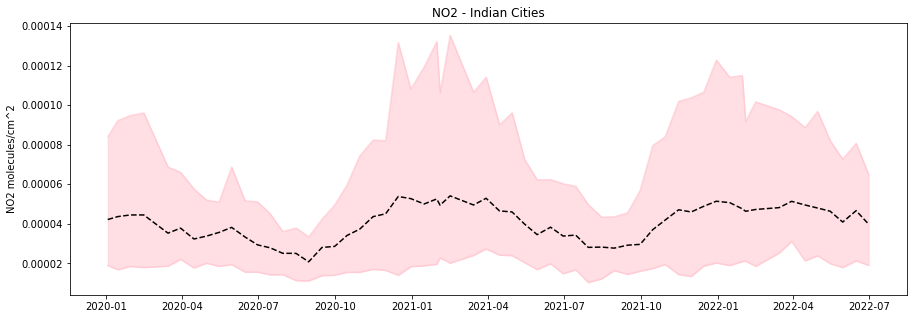

In [132]:
create_ribbon_charts(time_series_df,'tropospheric_NO2_column_number_density','date',
                     'NO2 molecules/cm^2','NO2 - Indian Cities')

From a simple time-series (dashed line), we would only know that NO2 levels in Indian cities increase in winters. But from the ribbon plots, we also know the distribution of NO2 levels in a time-series. We know that during winters, there is huge variation in NO2 levels in Indian cities compared to monsoon months. Few cities are extremely polluted in winters, but few are doing as well as they are doing in summers. Exploration of this variation gives more insight about the state of NO2 pollution in India.